**German credit**

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold



In [13]:
df = pd.read_csv('/content/german_credit.csv')
df.head()


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good


# Exploratory analisys

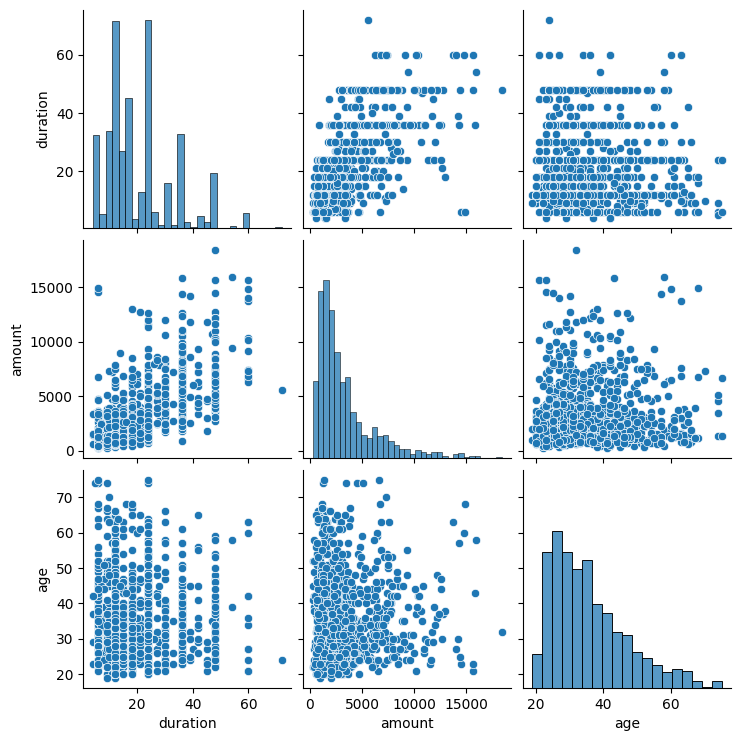

In [14]:
import matplotlib.pyplot as plt
# Analyze distributions
sns.pairplot(df)
plt.show()

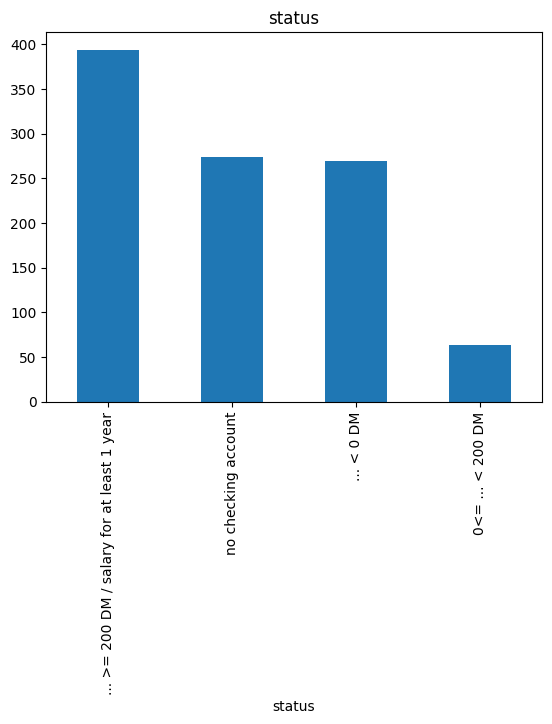

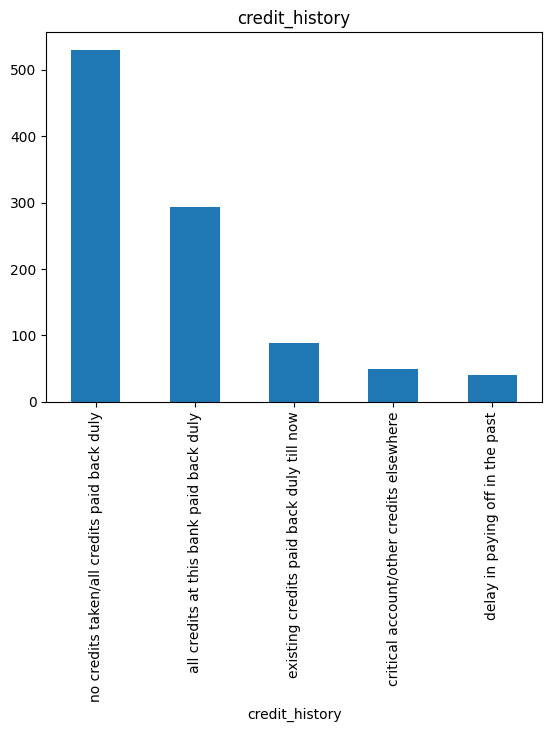

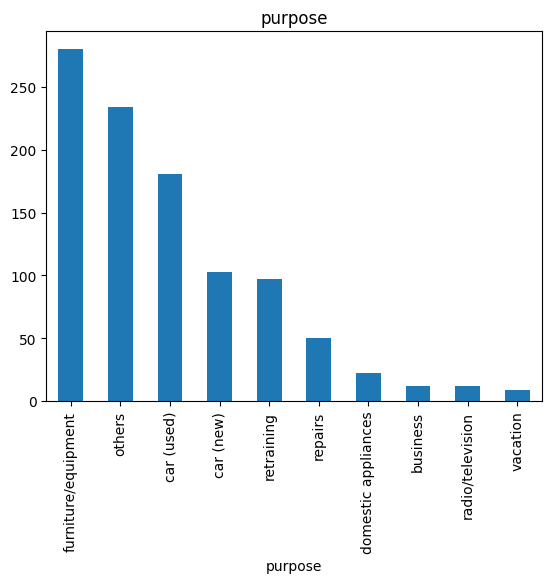

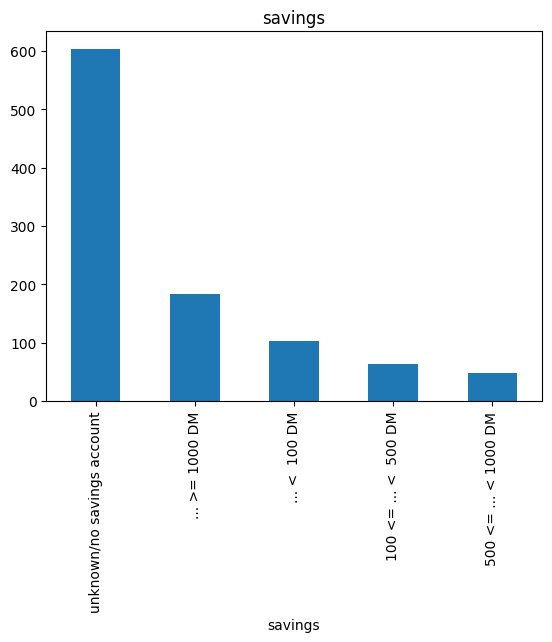

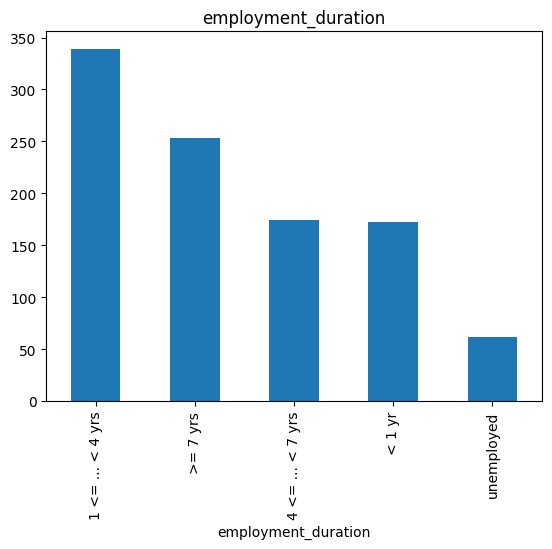

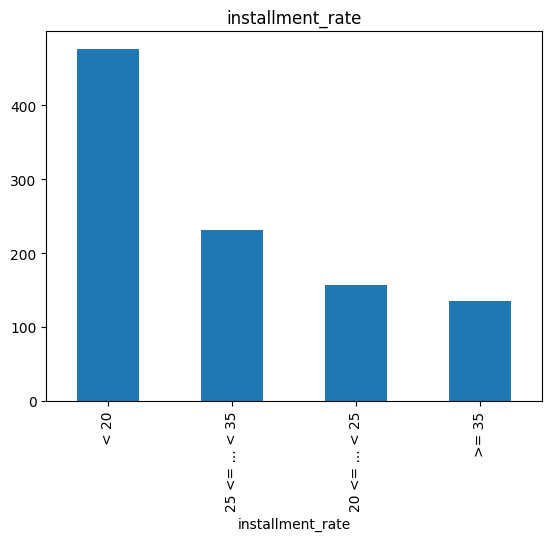

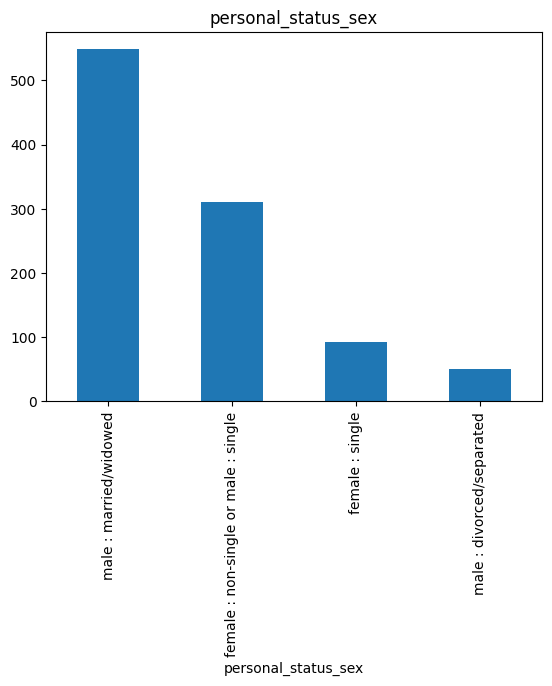

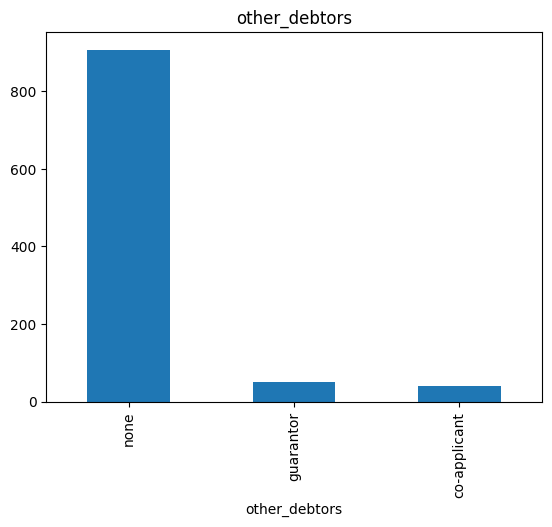

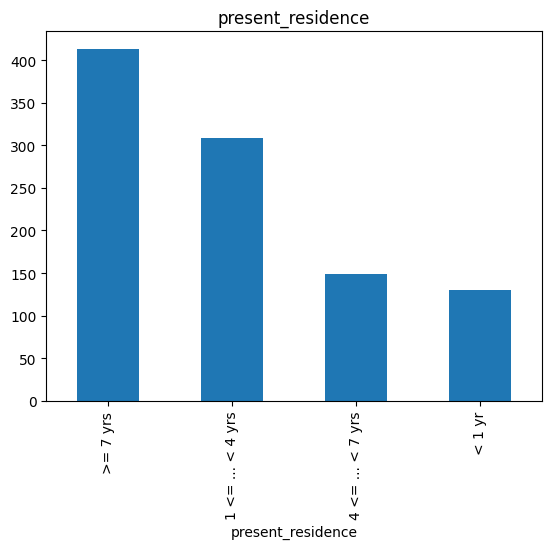

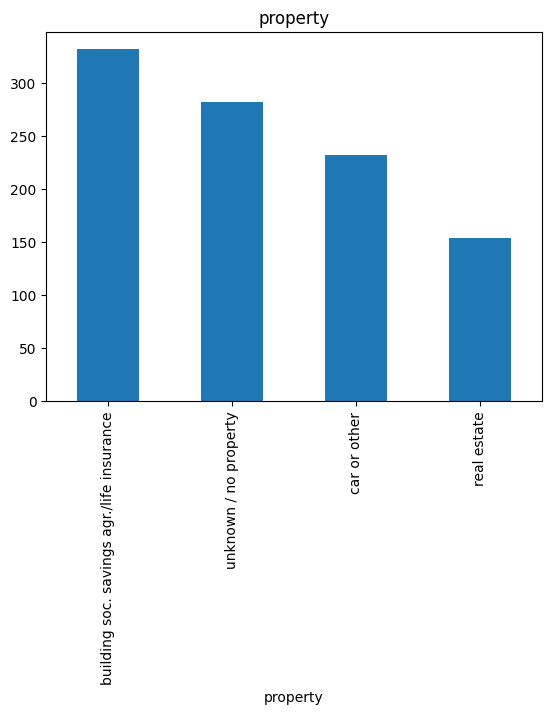

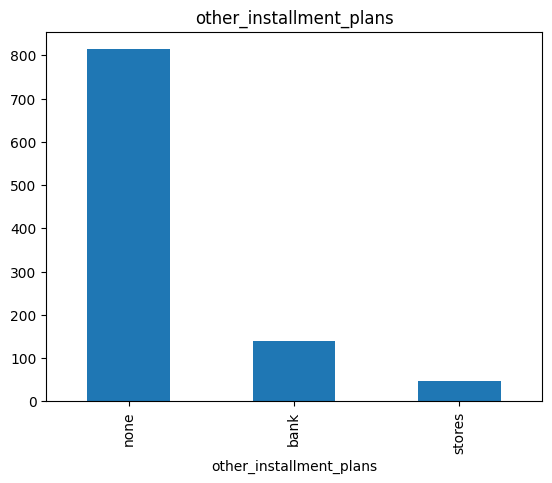

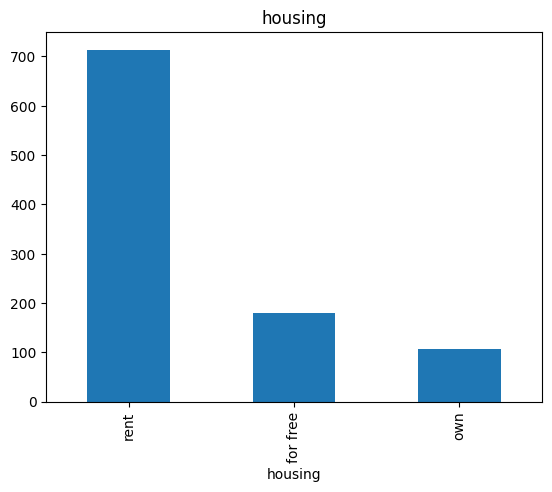

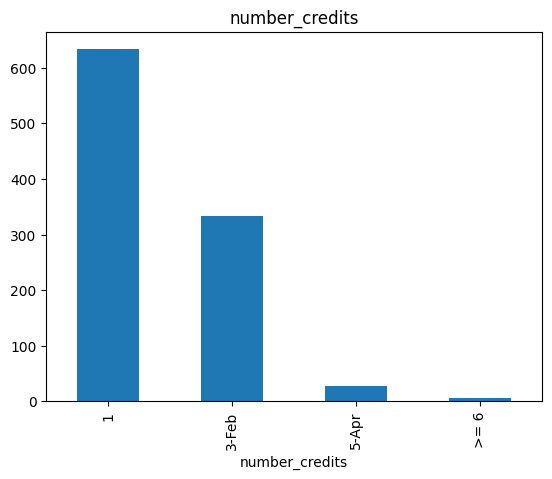

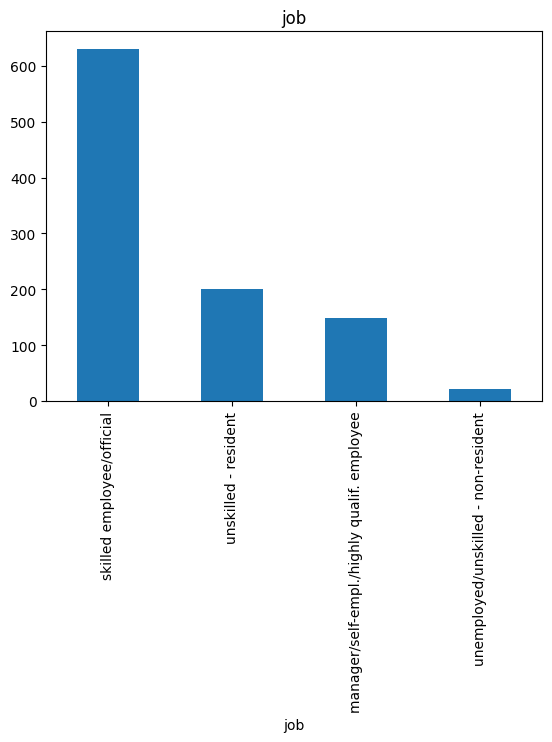

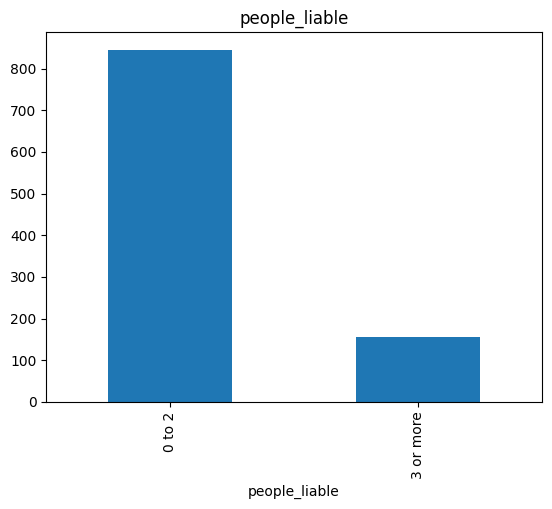

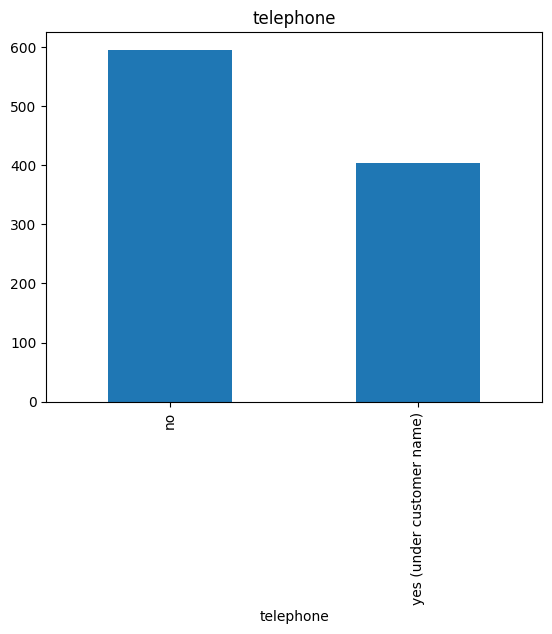

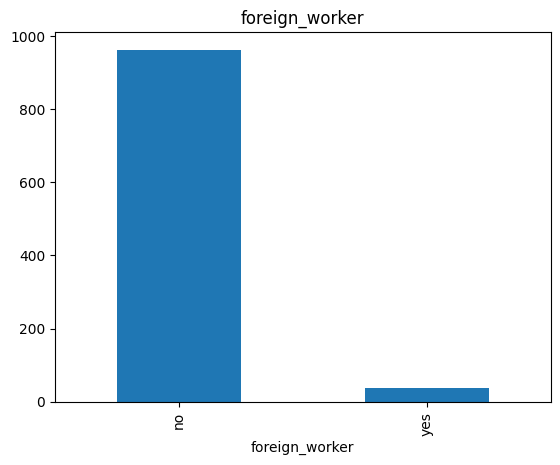

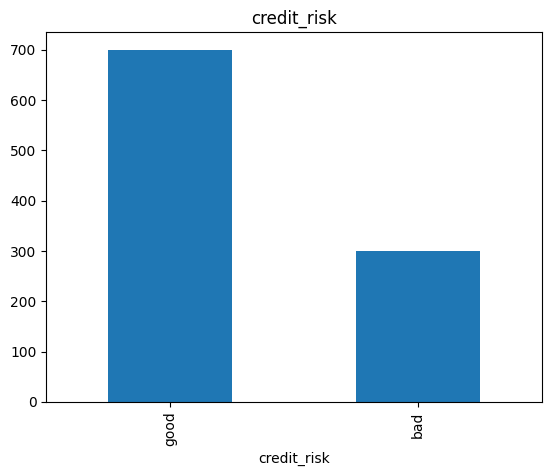

In [15]:
import matplotlib.pyplot as plt
# Analyze categorical features
for col in df.select_dtypes(include=['object']).columns:
  plt.figure()
  df[col].value_counts().plot(kind='bar')
  plt.title(col)
  plt.show()

# Data split

In [16]:
# Ahora sí, definamos nuestras variables de entrada y de salida, observa que ambas son DataFrames de Pandas:

X = df.iloc[:,:-1]

Y = df.iloc[:,-1]     # También puede ser: data[['class']]

In [17]:
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=1)

print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')

print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(850, 20) : dimensión de datos de entrada para entrenamiento y validación
(150, 20) : dimensión de datos de entrada para prueba
(850,) : dimensión de variable de salida para entrenamiento y validación
(150,) : dimensión de variable de salida para prueba


In [71]:
ytv.value_counts(normalize=True)

credit_risk
good    0.7
bad     0.3
Name: proportion, dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [19]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

In [20]:
numeric_cols

['duration', 'amount', 'age']

In [21]:
categorical_cols = df.select_dtypes('object').columns.tolist()

In [22]:
categorical_cols

['status',
 'credit_history',
 'purpose',
 'savings',
 'employment_duration',
 'installment_rate',
 'personal_status_sex',
 'other_debtors',
 'present_residence',
 'property',
 'other_installment_plans',
 'housing',
 'number_credits',
 'job',
 'people_liable',
 'telephone',
 'foreign_worker',
 'credit_risk']

# Transformaciones

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps=[
    ('impMediana', SimpleImputer(strategy='median')),
    ('escalaNum', MinMaxScaler(feature_range=(1, 2)))
])
num_pipeline_nombres = ['duration', 'amount', 'age']

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps=[
    ('impModa', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())  # Rename this encoder step
])

catImp_pipeline_nombres = [
    'status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate',
    'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans',
    'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker'
]

catOHE_pipeline = Pipeline(steps=[
    ('OneHotE', OneHotEncoder(drop='first'))
])

catOHE_pipeline_nombres = [
    'status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate',
    'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans',
    'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker'
]

# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers=[
    ('numpipe', num_pipeline, num_pipeline_nombres),
    ('catimp', catImp_pipeline, catImp_pipeline_nombres),
    ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)
],
remainder='passthrough')

# Modelos

In [24]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')

  # MLP - Red Neuronal Artificial / Perceptrón Lineal Multicapa:
  modelos.append(MLPClassifier(hidden_layer_sizes=(30,), max_iter=3000))
  nombres.append('MLP')

  # SVM - Máquina de Vector Soporte:
  modelos.append(SVC(gamma='scale'))
  nombres.append('SVM')

  # kNN - k-Vecinos más cercanos:
  modelos.append(KNeighborsClassifier())
  nombres.append('kNN')

  return modelos, nombres

In [25]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv)


  resultados.append(scores)
  print('>> %s: %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))

>> LR: 0.751 (0.035)
>> DT: 0.698 (0.058)
>> MLP: 0.726 (0.032)
>> SVM: 0.735 (0.026)
>> kNN: 0.715 (0.042)


In [35]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import geometric_mean_score
from sklearn.pipeline import Pipeline
import numpy as np

def calculate_metrics(model, X, y, cv):
    accuracy_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
    precision_scores = cross_val_score(model, X, y, scoring=make_scorer(precision_score, average='weighted'), cv=cv)
    recall_scores = cross_val_score(model, X, y, scoring=make_scorer(recall_score, average='weighted'), cv=cv)
    f1_scores = cross_val_score(model, X, y, scoring=make_scorer(f1_score, average='weighted'), cv=cv)
    gmean_scores = cross_val_score(model, X, y, scoring=make_scorer(geometric_mean_score, average='weighted'), cv=cv)

    return {
        'accuracy': accuracy_scores,
        'precision': precision_scores,
        'recall': recall_scores,
        'f1_score': f1_scores,
        'gmean': gmean_scores
    }

modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()

for i in range(len(modelos)):

    pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m', modelos[i])])

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

    metrics = calculate_metrics(pipeline, Xtv, np.ravel(ytv), cv)

    resultados.append({
        'modelo': nombres[i],
        'accuracy': np.mean(metrics['accuracy']),
        'precision': np.mean(metrics['precision']),
        'recall': np.mean(metrics['recall']),
        'f1_score': np.mean(metrics['f1_score']),
        'gmean': np.mean(metrics['gmean'])
    })

    print(f'>> {nombres[i]}: Accuracy: {np.mean(metrics["accuracy"]):.3f} (±{np.std(metrics["accuracy"]):.3f}), '
          f'Precision: {np.mean(metrics["precision"]):.3f} (±{np.std(metrics["precision"]):.3f}), '
          f'Recall: {np.mean(metrics["recall"]):.3f} (±{np.std(metrics["recall"]):.3f}), '
          f'F1-score: {np.mean(metrics["f1_score"]):.3f} (±{np.std(metrics["f1_score"]):.3f}), '
          f'Gmean: {np.mean(metrics["gmean"]):.3f} (±{np.std(metrics["gmean"]):.3f})')



>> LR: Accuracy: 0.751 (±0.035), Precision: 0.741 (±0.042), Recall: 0.751 (±0.035), F1-score: 0.740 (±0.039), Gmean: 0.669 (±0.053)
>> DT: Accuracy: 0.693 (±0.051), Precision: 0.704 (±0.054), Recall: 0.693 (±0.049), F1-score: 0.702 (±0.052), Gmean: 0.648 (±0.065)
>> MLP: Accuracy: 0.731 (±0.031), Precision: 0.717 (±0.052), Recall: 0.721 (±0.050), F1-score: 0.734 (±0.038), Gmean: 0.664 (±0.045)
>> SVM: Accuracy: 0.735 (±0.026), Precision: 0.733 (±0.061), Recall: 0.735 (±0.026), F1-score: 0.674 (±0.036), Gmean: 0.557 (±0.038)
>> kNN: Accuracy: 0.715 (±0.042), Precision: 0.688 (±0.054), Recall: 0.715 (±0.042), F1-score: 0.685 (±0.048), Gmean: 0.585 (±0.059)


Precision y Recall: La Logistic Regression (LR) tiene una buena combinación de precisión (0.741) y recall (0.751), indicando un buen balance entre falsos positivos y falsos negativos.

F1-Score: El LR tiene el mejor F1-Score (0.740), lo que refuerza su rendimiento balanceado en términos de precisión y recall.

Gmean: El LR también tiene un Gmean decente (0.669) comparado con otros modelos, indicando un buen rendimiento en ambas clases.

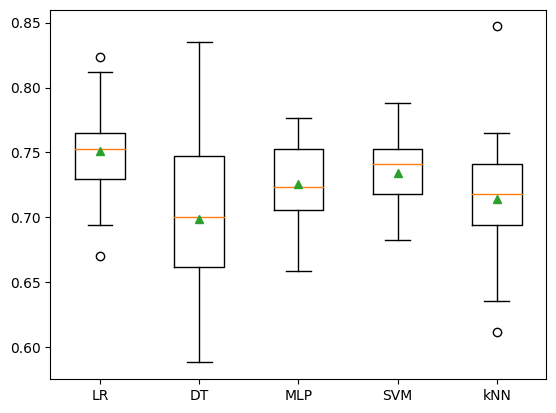

In [26]:
plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.show()

# Regularizaciones

In [27]:
#from pandas.core.common import random_state

def get_modelsRegs():
  modelos, nombres = list(), list()

  # LR - sin regularización:
  modelos.append(LogisticRegression(penalty='none', solver='lbfgs', max_iter=2000, random_state=1))
  nombres.append('LR')

  # Lasso:
  modelos.append(LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000, C=1., random_state=1))
  nombres.append('LASSO')

  # Ridge:
  modelos.append(LogisticRegression(penalty='l2', solver='liblinear', max_iter=2000, C=10.01, random_state=1))
  nombres.append('RIDGE')

  # Elastic-Net:
  modelos.append(LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', max_iter=4000, C=1., random_state=1))
  nombres.append('EN')

  return modelos, nombres

>> LR 0.755 (0.033)
>> LASSO 0.759 (0.036)
>> RIDGE 0.754 (0.035)
>> EN 0.761 (0.031)


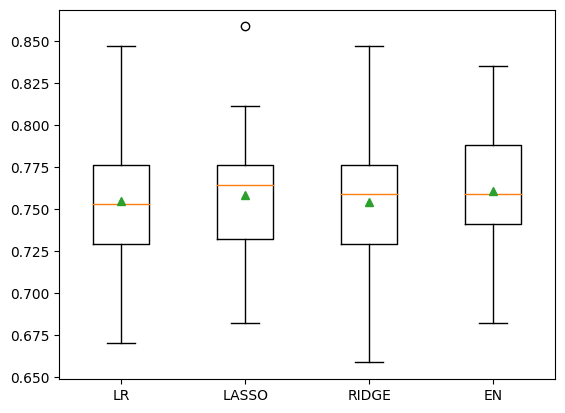

In [28]:
modelos, nombres = get_modelsRegs()
resultados = list()

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)
  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv)

  resultados.append(scores)
  print('>> %s %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))


plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.show()

# Fine tuning

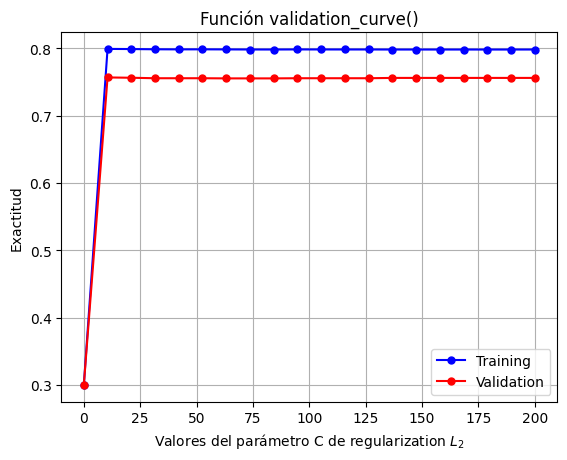

In [39]:
delta_C = np.linspace(.0001, 200., 20)

modelo = LogisticRegression(penalty='l1',
                            max_iter=10000,
                            solver='liblinear',
                            random_state=1)

Xx = columnasTransformer.fit_transform(Xtv)

cvLC = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=11)

train_scores, valid_scores = validation_curve(modelo,
                                              Xx,
                                              np.ravel(ytv),
                                              param_name="C",
                                              param_range=delta_C,
                                              cv=cvLC,
                                              scoring='accuracy')


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)


# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_C, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_C, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve()')
plt.xlabel('Valores del parámetro C de regularization $L_2$')
plt.ylabel('Exactitud')
plt.grid()
plt.legend(loc='lower right')
plt.show()

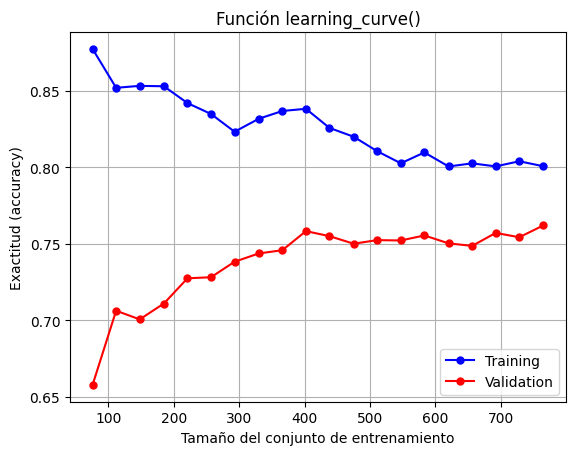

In [50]:
delta_train_sz = np.linspace(0.1, 1.0, 20)

cvLC = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=11)

train_sizes, train_scores, valid_scores = learning_curve(estimator=modeloLC,
                                                        X=Xx,
                                                        y=np.ravel(ytv),
                                                        cv=cvLC,
                                                        train_sizes=delta_train_sz,
                                                        scoring='accuracy')



# Obtengamos la gráfica de las curvas de aprendizaje
# cuando se incrementa el tamaño de la muestra:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función learning_curve()')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Exactitud (accuracy)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [37]:
# RIDGE - métrica L1:

modelo = LogisticRegression(penalty='l1', max_iter=10000, random_state=1)

dicc_grid = {'C':[0.0001,0.01,0.1,1.0,10.,100.],
             'solver':['newton-cg','lbfgs','liblinear','sag','saga']
             }

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)

grid = GridSearchCV(estimator=modelo,
                    param_grid=dicc_grid,
                    cv=cv,
                    scoring='accuracy')

In [38]:
# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(Xtv)

# Llevamos a cabo el proceso de etrenamiento con validación-cruzada y búsqueda de malla.
# Observa que de acuerdo a las opciones incluidas en la malla, se estarán realizando (6)(5)=30
# combinaciones diferentes, además de las (10)(5)=50 particiones de la validación-cruzada,
# lo cual implica también un mayor tiempo de entrenamiento.

grid.fit(Xx, np.ravel(ytv))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de exactitud obtenido con la mejor combinación: 0.7609411764705881
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 1.0, 'solver': 'saga'}
Métrica utilizada: accuracy


In [33]:
from sklearn.model_selection import validation_curve

In [72]:
print('Valor promedio de los resultados con los conjuntos de entrenamiento: %.3f' % train_mean[1:20].mean())
print('Valor promedio de los resultados con los conjuntos de validación: %.3f' % valid_mean[1:20].mean())

Valor promedio de los resultados con los conjuntos de entrenamiento: 0.823
Valor promedio de los resultados con los conjuntos de validación: 0.742


In [46]:
from sklearn.model_selection import learning_curve

In [49]:
modeloLC = LogisticRegression(penalty='l1',
                              max_iter=10000,
                              C=1,
                              solver='saga',
                              random_state=1)

In [51]:
print(train_scores.shape)

(20, 50)


# Modelo final

In [52]:

modelo = LogisticRegression(penalty='l1',
                            max_iter=10000,
                            C=1.0,
                            solver='saga',
                            random_state=1)

# Entrenamos el modelo por última vez con los datos de entrenamiento y validación conjuntos:
Xct = columnasTransformer.fit(Xtv)
Xxt = Xct.transform(Xtv)
modelo.fit(Xxt, np.ravel(ytv))

# Transformamos los datos de prueba y los utilizamos por primera vez para obtener sus predicciones
# y desempeño del modelo:

Xxtest = Xct.transform(Xtest)
print(modelo.score(Xxtest, np.ravel(ytest)))

0.74


In [53]:
pp = modelo.predict(Xxtest)
cm = confusion_matrix(ytest, pp)
print(cm)

[[20 25]
 [14 91]]


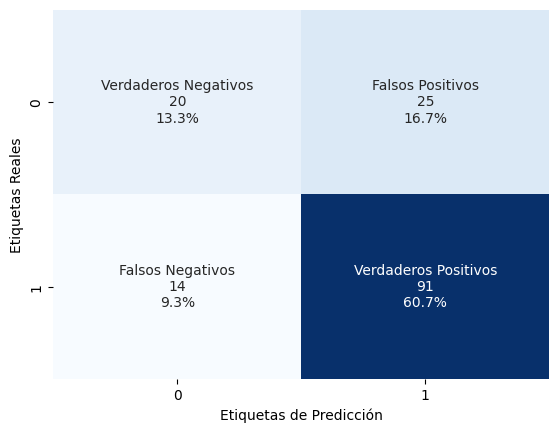

In [54]:
txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']
frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()



*   True Positives (TP = 91): El modelo predijo correctamente 91 instancias como "Bad".
*   True Negatives (TN = 20): El modelo predijo correctamente 20 instancias como "Good".
*   False Positives (FP = 25): El modelo predijo incorrectamente 25 instancias como "Bad" cuando en realidad eran "Good".
*   False Negatives (FN = 14): El modelo predijo incorrectamente 14 instancias como "Good" cuando en realidad eran "Bad".








La matriz de confusión muestra que el modelo tiene un buen desempeño en la predicción de la clase "Bad" (alta sensibilidad y precisión). Sin embargo, la especificidad es relativamente baja, lo que indica que el modelo tiene dificultades para identificar correctamente las instancias de la clase "Good".

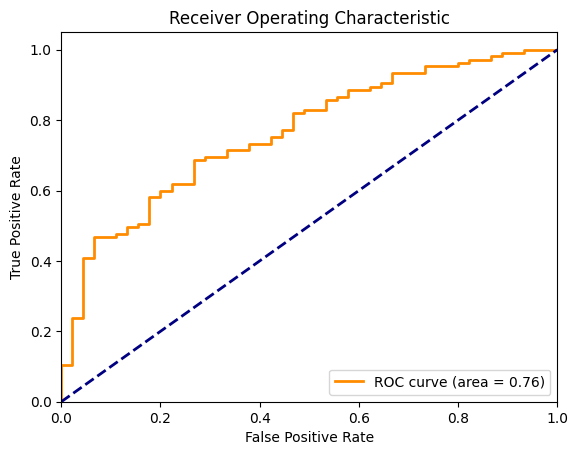

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'modelo' is your trained logistic regression model
y_score = modelo.predict_proba(Xxtest)[:, 1]  # Probability of positive class

# Convert string labels to numerical labels
ytest_numeric = [1 if label == 'good' else 0 for label in ytest]  # Assuming 'good' is the positive class

fpr, tpr, thresholds = roc_curve(ytest_numeric, y_score)  # Use numerical labels
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

El ROC AUC de 0.76 confirma que el modelo tiene un buen rendimiento general en términos de discriminación entre las clases "Good" y "Bad".

El modelo ha demostrado una buena capacidad para identificar correctamente los casos de alto riesgo (clase "Bad"), con un ROC AUC de 0.76, lo que indica que el modelo puede discriminar efectivamente entre solicitantes con buen y mal riesgo crediticio en un 76% de los casos.

Sin embargo, la baja especificidad (44.4%) sugiere que el modelo aún tiene margen de mejora en la identificación de los solicitantes con buen historial crediticio (clase "Good"). Esto se traduce en un número significativo de falsos positivos (25 instancias), lo cual podría resultar en la negación innecesaria de créditos a clientes potencialmente buenos.